In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# 실습 문제 1:  
$y = exp^{-x/10}sin(x)$

 consider 10000 x intervals in the range [0,10]

### try:

1. plot the function y vers x  in the range [0,10]


2. compute the mean and std of y for x values in [4,7]


3. for x in the range [4,7],find the value $y_{m}$ such that 95% of y values are less than $y_{m}$ 


4. plot $dy/dx$ vers $x$

5. find the locations where $dy/dx =0 $

#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]
#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]
#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]
#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]
#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]
#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.612720327893528, 7.754312981483321]
#1
#2
mean -0.29563628639320116
std 0.3144532369395424
#3
std 0.27056448813742756
#4
#5
[1.4711276743037347, 4.6127203

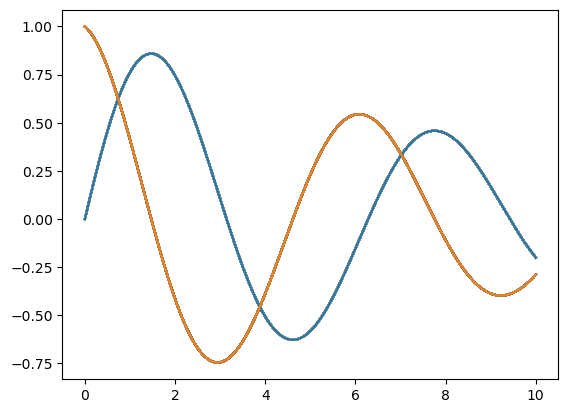

In [7]:
%%timeit

x = np.linspace(0,10,10000)
y = 1/np.exp(x/10) * np.sin(x)

print("#1")
plt.plot(x,y)

print("#2")
print("mean", np.mean(y[4000:7000]))
print("std", np.std(y[4000:7000]))

print("#3")
print("std", np.percentile(y[4000:7000], 95))

print("#4")
dydx = np.gradient(y,x)
plt.plot(x,dydx)

print("#5")
# print(dydx[dydx == 0])
x = sp.Symbol('x')
equation = sp.exp(-x/10) * sp.sin(x)
derivative = sp.diff(equation, x)

print(list(map(float,sp.solveset(derivative, x, domain = sp.Interval(0, 10))))) # atan10

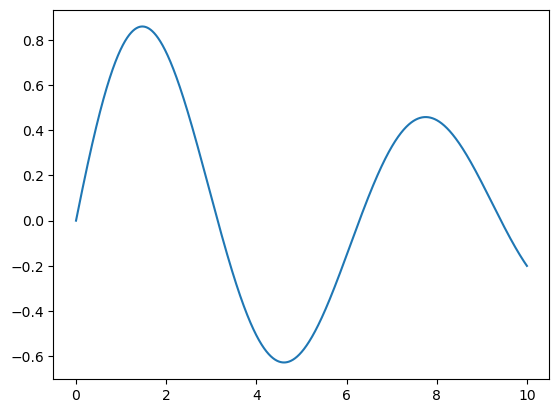

In [8]:
N = 10000
x= np.linspace(0,10,N+1)
y = np.exp(-x/10) * np.sin(x)
plt.plot(x,y)

In [9]:
np.mean( y[(x>=4)*(x<=7)])
np.std(y[(x>=4)*(x<=7)])

0.31448753875085117

In [10]:
#3
np.percentile(y[(x>=4)*(x<=7)],95)

0.2706700401876704

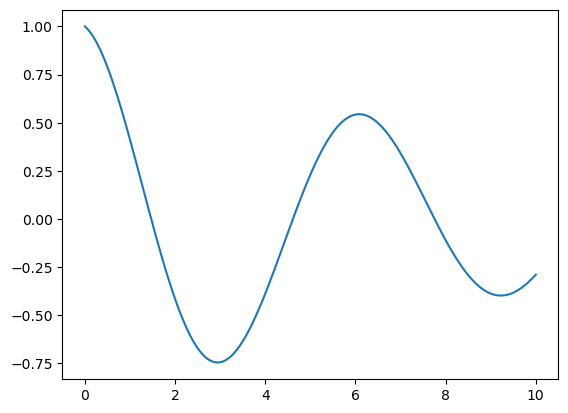

In [11]:
#4
plt.plot(x, np.gradient(y,x))

In [12]:
#5
dydx = np.gradient(y,x)

In [13]:
dydx[1:] * dydx[:-1]<0
#0*1 1*2 2*3 ... n*n (one is - 0 , one is - n) it * with  n*n+1 value to find the -  to + and + to -

array([False, False, False, ..., False, False, False])

In [14]:
x[1:][dydx[1:] * dydx[:-1]<0]

array([1.472, 4.613, 7.755])

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([1.472 , 2.1003, 2.7286, 3.3569, 3.9852, 4.6135, 5.2418, 5.8701,
        6.4984, 7.1267, 7.755 ]),
 <BarContainer object of 10 artists>)

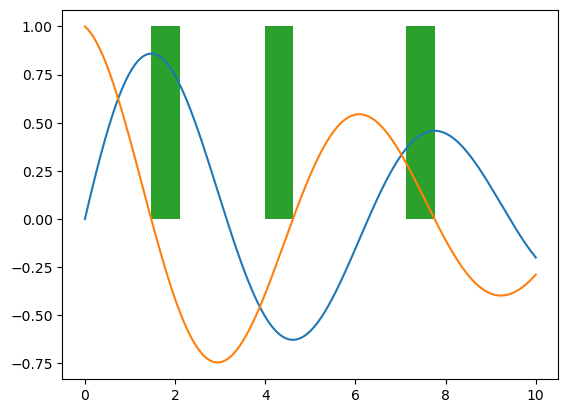

In [15]:
plt.plot(x,y)
plt.plot(x, np.gradient(y,x))
plt.hist(x[1:][dydx[1:] * dydx[:-1]<0])

# 실습문제 2:

sum together every number from 0 to 10000 except for those than can be divided by 4 or 7 . Do this 
one line 

아래 하신 방법도 좋지만 %% 메서드를 쓰게 되면 에러가 나는 것들에 대해서 차후 차차 사용할 수 있는 뭐(데코레이터뿐만 아니라 ) 상속 자들 같은경우도 논의해보면 좋을것 같습니다. 

In [16]:
%%timeit
nums = np.arange(0,10001,1)
sum(nums[(nums%4  != 0) * (nums%7  != 0)])

318 µs ± 21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
%%timeit
sum(i for i in range(28) if i%4 == 0 or i%7 == 0)

1.22 µs ± 3.08 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


# 실습문제 3
Polar coordinate system

consider the flower petal $r(\theta) = 1 + \frac{3}{4}  sin(3\theta)$ for $0 \leq \theta \leq 2\pi$

1. make a plot of the flower (xy point)
2. compute the area using the calculus formula $A = \int_{0}^{2\pi}\frac{1}{2}r^{2}d\theta$ 
3. compute the arclength using the calculus formula $L = \int_{0}^{2\pi}\sqrt{r^{2}+(\frac{dr}{d\theta})^{2}}d\theta$

In [ ]:
#1
theta = np.linspace(0,2*np.pi,1000)
r = 1+ 3/4 * np.sin(3*theta)
# plot polar coordinate system to cartesian coordinate
x = r*np.cos(theta)
y = r* np.sin(theta)
plt.plot(x,y)

In [ ]:
A = 1/2 * sum(r**2) * (theta[1]-theta[0])
A

In [ ]:
sum(np.sqrt(r**2 + np.gradient(r,theta)**2)) * (theta[1]-theta[0])

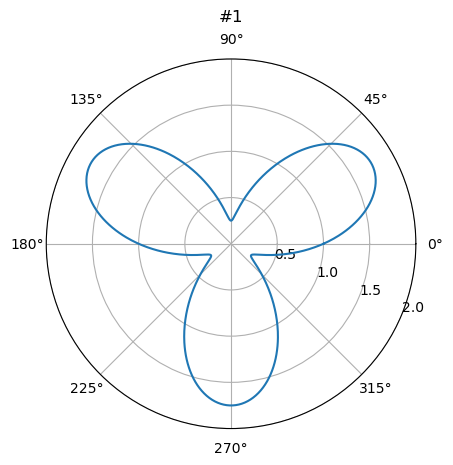

#2
4.02516558741192
#3
11.624988519


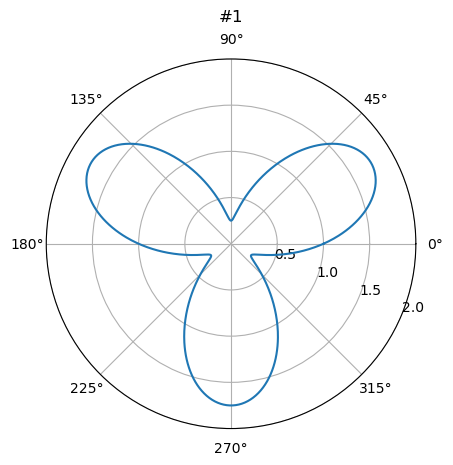

#2
4.02516558741192
#3
11.624988519


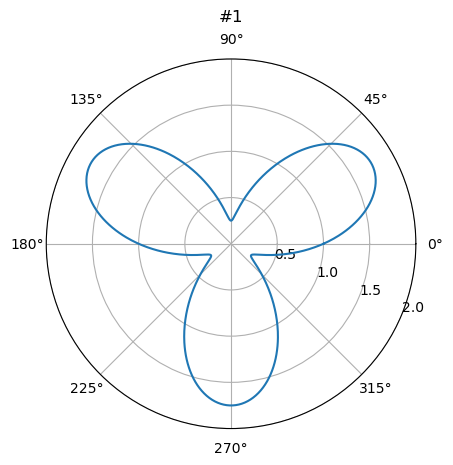

#2
4.02516558741192
#3
11.624988519


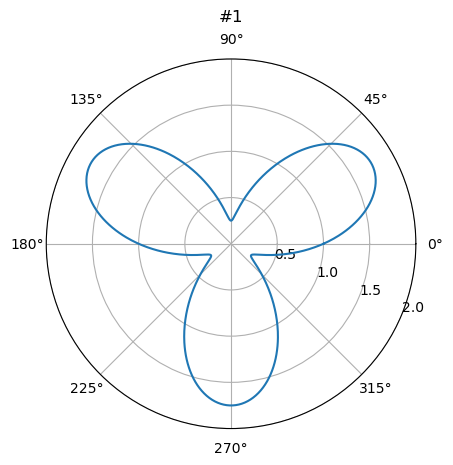

#2
4.02516558741192
#3
11.624988519


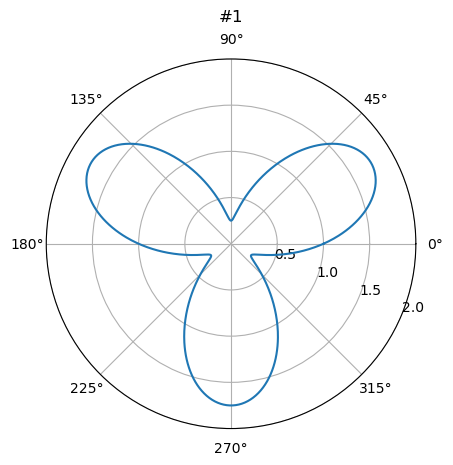

#2
4.02516558741192
#3


KeyboardInterrupt: 

In [20]:
%%timeit

# modified from official tutorial
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

theta = np.linspace(0, 2*np.pi, 1000)
r = 1 + np.sin(3*theta)*0.75

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(1)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("#1", va='bottom')
plt.show()

print("#2")
t = sp.Symbol('t')
r = 1 + sp.sin(3*t)*0.75
print(sp.integrate(r**2/2, (t, 0, 2*sp.pi)).n())

print("#3")
drdt = sp.diff(r, t)
print(sp.integrate(sp.sqrt(r**2 + drdt**2), (t, 0, 2*sp.pi)).n())

# 실습문제 4:

the power emitted by a blackbody is $P = A\sigma\epsilon T^4$ after measuring the temperature of  a star you find that $T(t)=T_0 \frac{1}{1+e^{-kt}}$. plot the total energy emitted by the star as a function of time using the fact that $E(t) = \int_{t'=0}^{t'=t}P(t')dt'$

[hint:Dimensionless quantity](https://en.wikipedia.org/wiki/Dimensionless_quantity)
  

$ P/A \sigma \epsilon =T^4$

$ P/(A \sigma \epsilon  T_0^4)= \left( \frac{1}{1+e^{-kt}}\right)^4$ from   $T(t)=T_0 \frac{1}{1+e^{-kt}}$   
keep kt together

kt =np.linspace(0,3,100) no demention k is inverse unit of time experentional argument is dementionless
  Power = (1/(1+np.exp(-kt)))**4

In [ ]:
##생각보다 쉬운문제지만 못푼 사람도 많은 문제입니다. 

kt = np.linspace(0,3,100)
P = (1/(1+np.exp(-kt)))**4
plt.plot(kt,P)

In [ ]:
kt = np.linspace(0,3,100)
P = (1/(1+np.exp(-kt)))**4
E = np.cumsum(P)*(kt[1]-kt[0])

plt.plot(kt,P)
plt.plot(kt,E)
plt.xlabel('$kt$')
plt.ylabel(r"$\left(\frac{P}{A \sigma \epsilon T_0^4}\right) E(kt)$",fontsize=20)

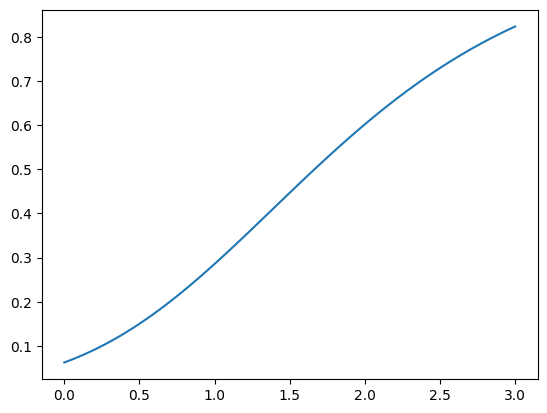

In [3]:
%%timeit

import matplotlib.pyplot as plt
import numpy as np

C = 1
kt = np.linspace(0,3,100)
y = C*(1/(1+np.exp(-kt)))**4

plt.plot(kt,y)